In [1]:
#_______import labs
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv("C:/Users/Rizwan/Desktop/datasets/Mall_Customers.csv")     #_____read the data

In [3]:
df.sample(9)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
158,159,Male,34,78,1
136,137,Female,44,73,7
7,8,Female,23,18,94
122,123,Female,40,69,58
102,103,Male,67,62,59
171,172,Male,28,87,75
95,96,Male,24,60,52
68,69,Male,19,48,59
116,117,Female,63,65,43


In [4]:
df.keys()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.isna().sum() #_____check the misssing vals

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()  #_-------check the duplicated vlaas

0

# what needs to done with "Dataset to used":
    1. encode the string values 
    2. featrues scaling

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler


# Columns to be one-hot encoded and scaled
categorical_features = ['Gender']
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # Pass through the 'CustomerID' column
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the data
final_df = pipeline.fit_transform(df)

# Convert the transformed data back to a DataFrame
column_names = (
    ['Female', 'Male']  # One-hot encoded gender columns
    + numeric_features   # Scaled numeric columns
    + ['CustomerID']     # Original CustomerID column
)

final_df = pd.DataFrame(final_df, columns=column_names)

# Display the final DataFrame
final_df

,Female,Male,Age,Annual Income (k$),Spending Score (1-100),CustomerID
0,0.0,1.0,-1.424569,-1.738999,-0.434801,1.0
1,0.0,1.0,-1.281035,-1.738999,1.195704,2.0
2,1.0,0.0,-1.352802,-1.700830,-1.715913,3.0
3,1.0,0.0,-1.137502,-1.700830,1.040418,4.0
4,1.0,0.0,-0.563369,-1.662660,-0.395980,5.0
...,...,...,...,...,...,...
195,1.0,0.0,-0.276302,2.268791,1.118061,196.0
196,1.0,0.0,0.441365,2.497807,-0.861839,197.0
197,0.0,1.0,-0.491602,2.497807,0.923953,198.0
198,0.0,1.0,-0.491602,2.917671,-1.250054,199.0


In [8]:
# Columns to be one-hot encoded and scaled
categorical_features = ['Gender']
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough'  # Pass through the 'CustomerID' column
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the data
final_df = pipeline.fit_transform(df)

# Convert the transformed data back to a DataFrame
column_names = (
    ['Female', 'Male']  # One-hot encoded gender columns
    + numeric_features   # Scaled numeric columns
    + ['CustomerID']     # Original CustomerID column
)

final_df = pd.DataFrame(final_df, columns=column_names)
# Round Male, Female, and CustomerID columns to the nearest integer
final_df[['Female', 'Male', 'CustomerID']] = final_df[['Female', 'Male', 'CustomerID']].round().astype(np.int64)

# Display the final DataFrame
final_df

,Female,Male,Age,Annual Income (k$),Spending Score (1-100),CustomerID
0,0,1,0.019231,0.000000,0.387755,1
1,0,1,0.057692,0.000000,0.816327,2
2,1,0,0.038462,0.008197,0.051020,3
3,1,0,0.096154,0.008197,0.775510,4
4,1,0,0.250000,0.016393,0.397959,5
...,...,...,...,...,...,...
195,1,0,0.326923,0.860656,0.795918,196
196,1,0,0.519231,0.909836,0.275510,197
197,0,1,0.269231,0.909836,0.744898,198
198,0,1,0.269231,1.000000,0.173469,199


In [9]:
final_df.describe()

,Female,Male,Age,Annual Income (k$),Spending Score (1-100),CustomerID
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.560000,0.440000,0.400962,0.373443,0.502041,100.500000
std,0.497633,0.497633,0.268635,0.215285,0.263505,57.879185
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.206731,0.217213,0.344388,50.750000
50%,1.000000,0.000000,0.346154,0.381148,0.500000,100.500000
75%,1.000000,1.000000,0.596154,0.516393,0.734694,150.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,200.000000


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Female                  200 non-null    int64  
 1   Male                    200 non-null    int64  
 2   Age                     200 non-null    float64
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
 5   CustomerID              200 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 9.5 KB


In [11]:
#_----------check the distrebution 





C:\Users\Rizwan\AppData\Local\Temp\ipykernel_5280\127103161.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df[column], label=column, shade=True)
C:\Users\Rizwan\AppData\Local\Temp\ipykernel_5280\127103161.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df[column], label=column, shade=True)
C:\Users\Rizwan\AppData\Local\Temp\ipykernel_5280\127103161.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df[column], label=column, shade=True)


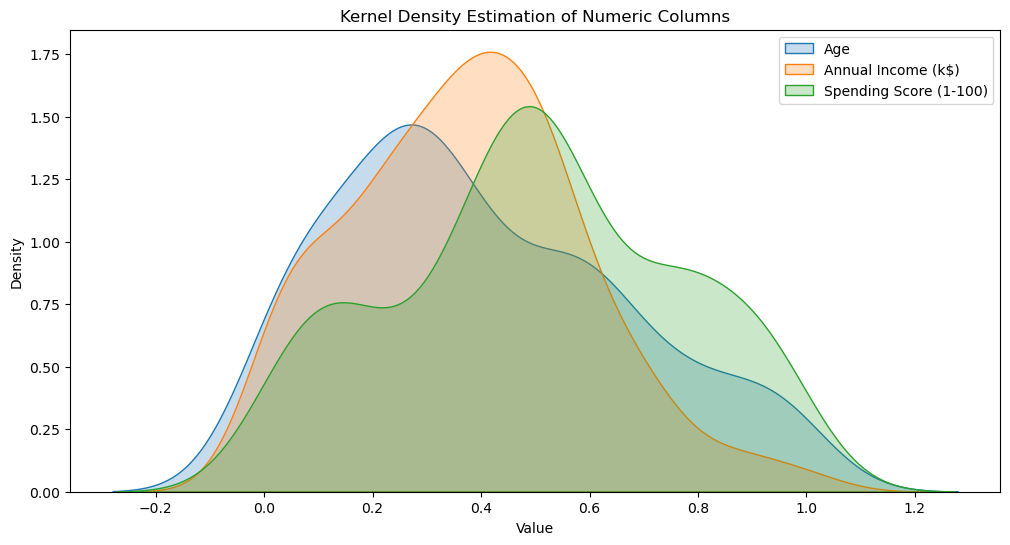

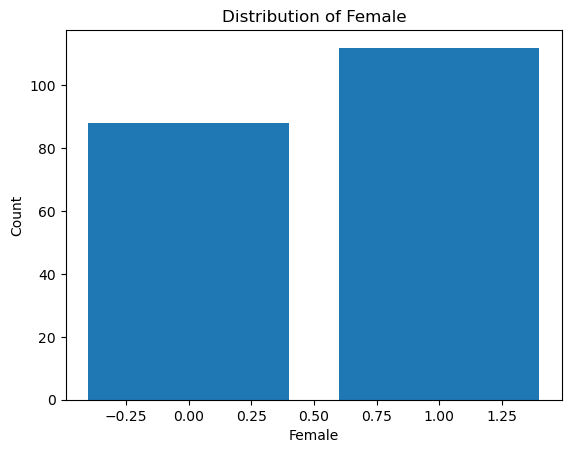

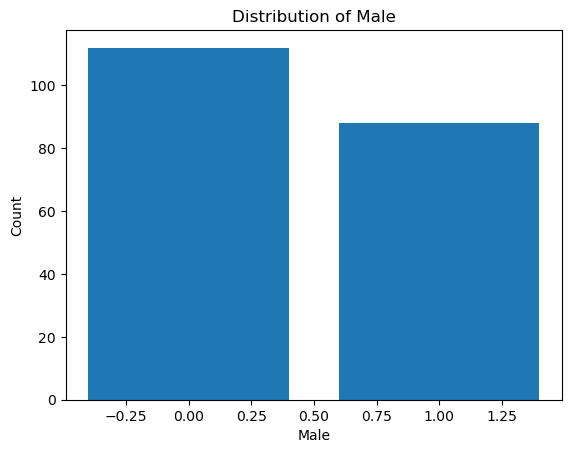

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove 'CustomerID' column for visualization
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_columns = ['Female', 'Male']

# Plot KDE plots for numeric columns
plt.figure(figsize=(12, 6))
for column in numeric_columns:
    sns.kdeplot(final_df[column], label=column, shade=True)

plt.title("Kernel Density Estimation of Numeric Columns")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plot bar plots for categorical columns
for column in categorical_columns:
    counts = final_df[column].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()


In [13]:
# Print distribution in number form
for column in numeric_columns + categorical_columns:
    distribution = final_df[column].value_counts().sort_index()
    print(f"Distribution of {column}:\n{distribution}\n")

Distribution of Age:
0.000000     4
0.019231     8
0.038462     5
0.057692     5
0.076923     3
0.096154     6
0.115385     4
0.134615     3
0.153846     2
0.173077     6
0.192308     4
0.211538     5
0.230769     7
0.250000     8
0.269231    11
0.288462     3
0.307692     5
0.326923     9
0.346154     6
0.365385     3
0.384615     6
0.403846     3
0.423077     6
0.442308     2
0.461538     2
0.480769     3
0.500000     2
0.519231     3
0.538462     3
0.557692     6
0.576923     5
0.596154     7
0.615385     5
0.634615     2
0.653846     2
0.673077     2
0.692308     4
0.711538     1
0.730769     1
0.750000     2
0.769231     2
0.788462     4
0.807692     3
0.865385     2
0.884615     1
0.903846     2
0.923077     2
0.942308     4
0.961538     3
0.980769     1
1.000000     2
Name: Age, dtype: int64

Distribution of Annual Income (k$):
0.000000    2
0.008197    2
0.016393    2
0.024590    2
0.032787    4
           ..
0.721311    4
0.803279    2
0.860656    2
0.909836    2
1.000000    2

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_5280\451029878.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df[column], shade=True)


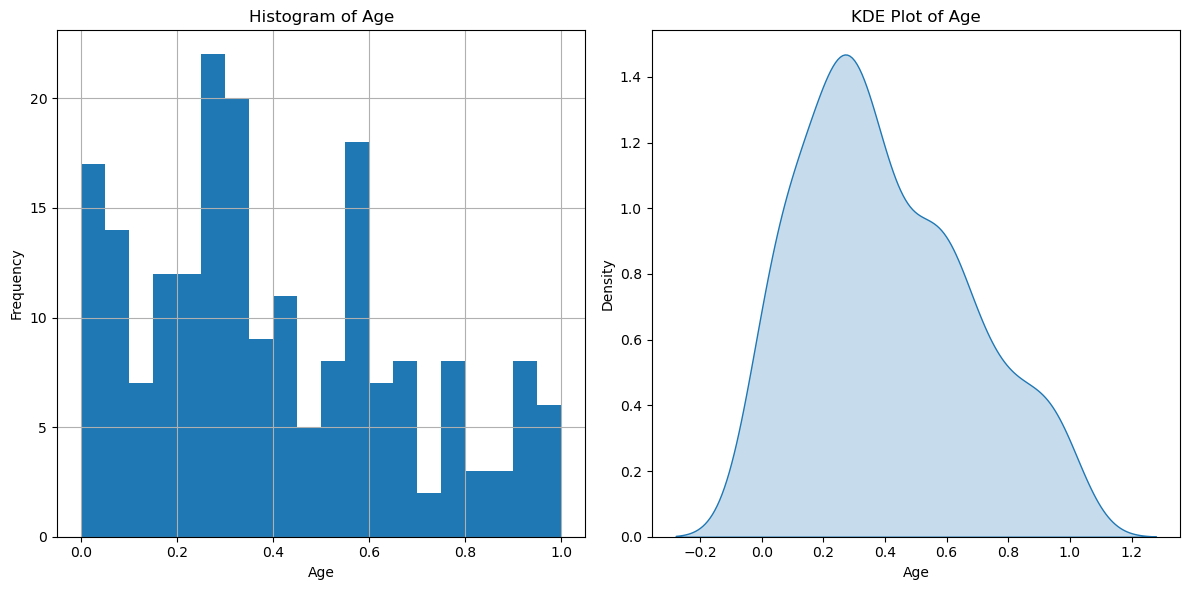

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_5280\451029878.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df[column], shade=True)


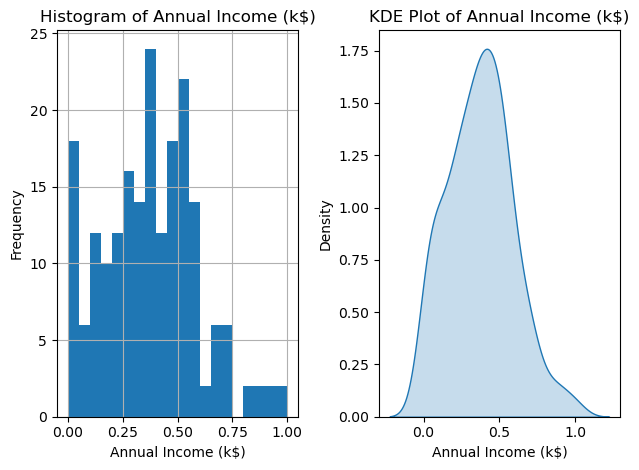

C:\Users\Rizwan\AppData\Local\Temp\ipykernel_5280\451029878.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_df[column], shade=True)


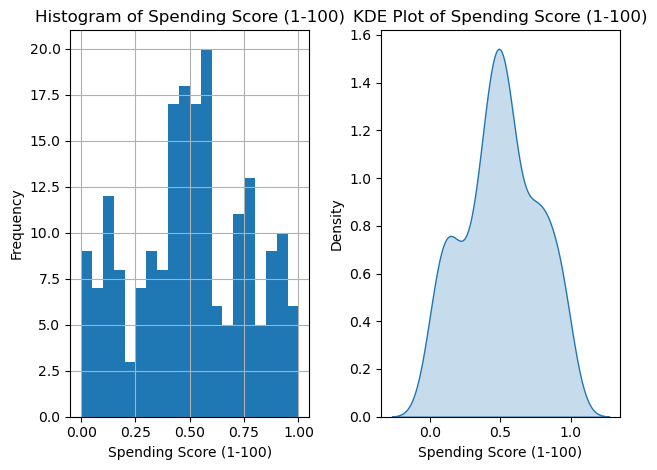

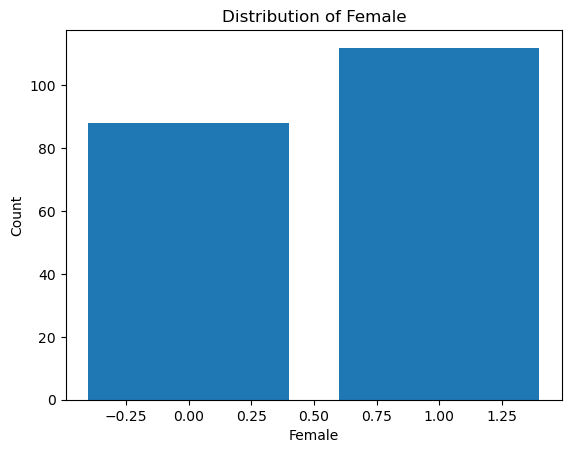

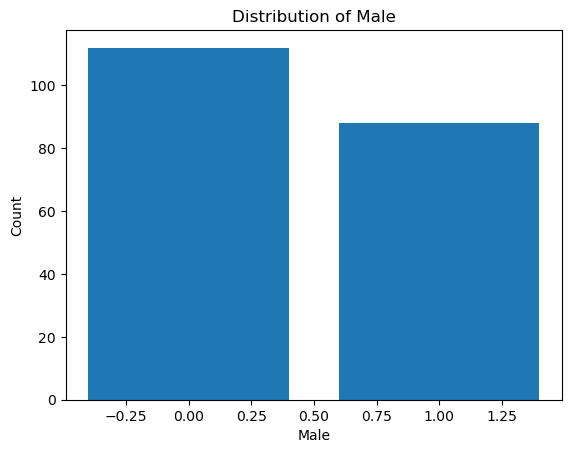

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms and KDE plots for numeric columns
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(12, 6))
for column in numeric_columns:
    plt.subplot(1, 2, 1)  # Plot histograms on the left
    final_df[column].hist(bins=20)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)  # Plot KDE plots on the right
    sns.kdeplot(final_df[column], shade=True)
    plt.title(f"KDE Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

# Plot bar plots for categorical columns
categorical_columns = ['Female', 'Male']

for column in categorical_columns:
    counts = final_df[column].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

    

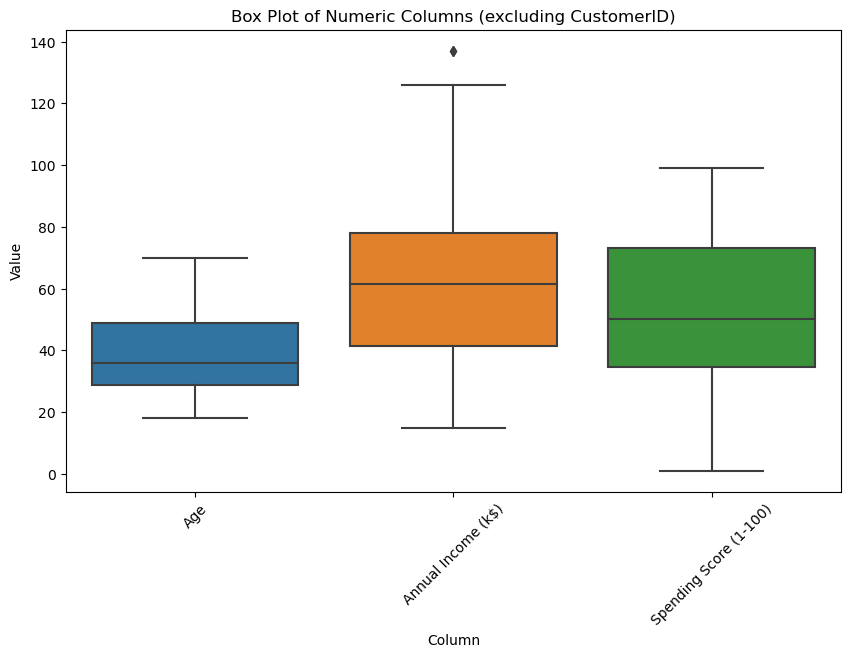

Outliers:
     Age  Annual Income (k$)  Spending Score (1-100)
198  NaN                 137                     NaN
199  NaN                 137                     NaN


In [15]:
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Plot box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Box Plot of Numeric Columns (excluding CustomerID)")
plt.xlabel("Column")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

# Calculate and display outliers using IQR method
outliers = pd.DataFrame(columns=numeric_columns)
for column in numeric_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

print("Outliers:")
print(outliers)
